In this code i cleaned the data as the following


1.   drop null values
2. drop outliers   




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns' , 26)

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/final_internship_data.csv")
df

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,0.710796,-1.289737,0.710366,1,0,25,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,0.711335,-1.291023,0.711480,6,12,12,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [4]:
df.dtypes

,0
User ID,object
User Name,object
Driver Name,object
Car Condition,object
Weather,object
Traffic Condition,object
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64


In [5]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [6]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [7]:
df.isna().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [10]:
def calculate_outliers(df):

    # function to Calculate the number of outliers and their percentage for each numeric column in the DataFrame.

    outlier_info = []

    for column in df.columns:
        # Ensure the column contains numeric data
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Determine outliers using the IQR method
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

            # Calculate the number and percentage of outliers
            num_outliers = outliers.count()
            total_values = df[column].count()
            percent_outliers = (num_outliers / total_values) * 100

            # Store the results
            outlier_info.append({
                'Column': column,
                'Number of Outliers': num_outliers,
                'Percentage of Outliers': percent_outliers,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound
            })

    return pd.DataFrame(outlier_info)

In [11]:
# Calculate outliers
outlier_stats = calculate_outliers(df)
print(outlier_stats)

               Column  Number of Outliers  Percentage of Outliers  \
0         fare_amount               43329                8.665887   
1    pickup_longitude               33965                6.793068   
2     pickup_latitude               23701                4.740247   
3   dropoff_longitude               35805                7.161072   
4    dropoff_latitude               30748                6.149661   
5     passenger_count               56526               11.305313   
6                hour                   0                0.000000   
7                 day                   0                0.000000   
8               month                   0                0.000000   
9             weekday                   0                0.000000   
10               year                   0                0.000000   
11           jfk_dist               59285               11.857119   
12           ewr_dist               28380                5.676057   
13           lga_dist             

In [12]:
#    function to Creates a boxplot for each column in the DataFrame.

def plot_boxplot_per_column(df):

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(df[column]):
            plt.figure(figsize=(8, 6))
            df.boxplot(column=column , vert=False)
            plt.title(f'Boxplot of {column}')
            # plt.ylabel(column)
            plt.xticks([])
            plt.show()


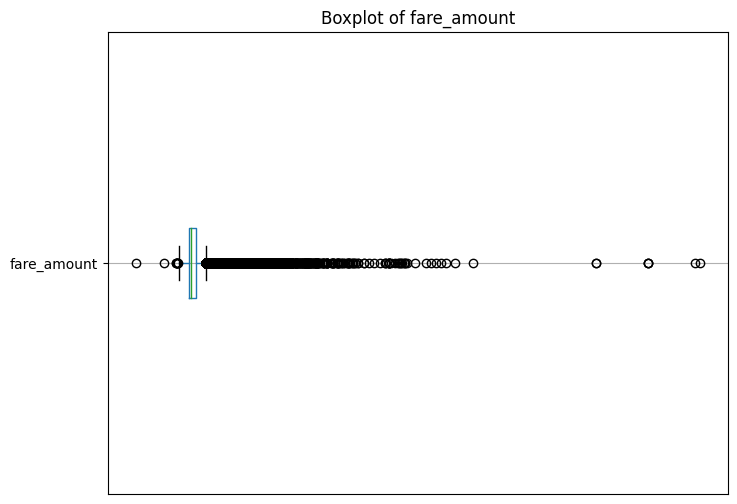

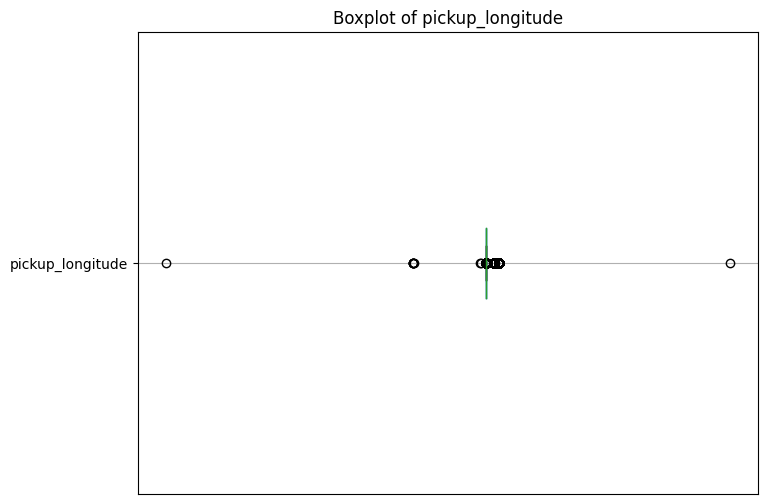

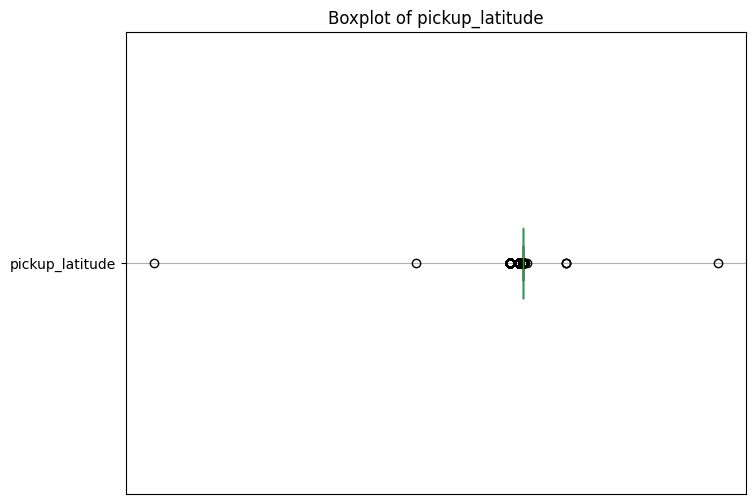

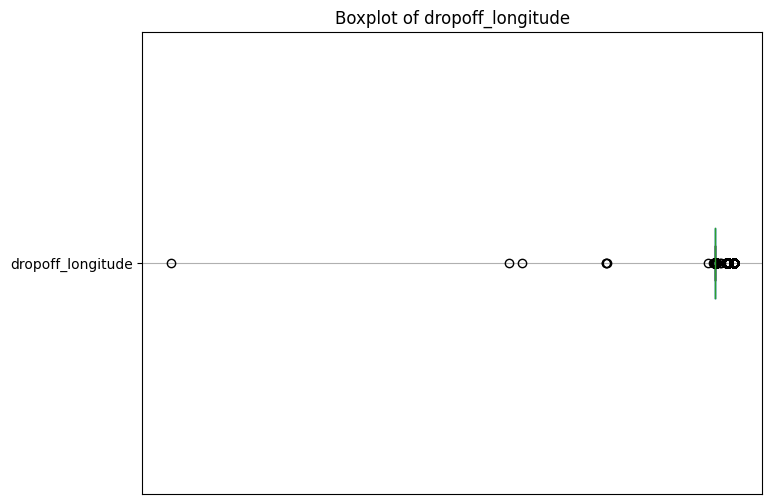

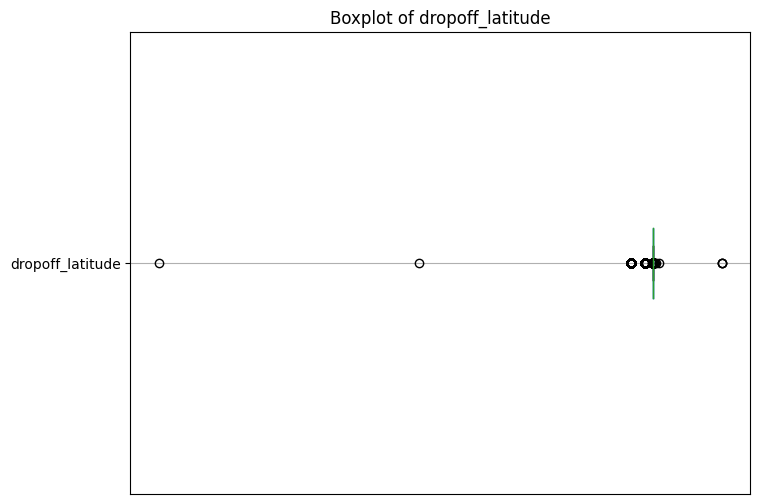

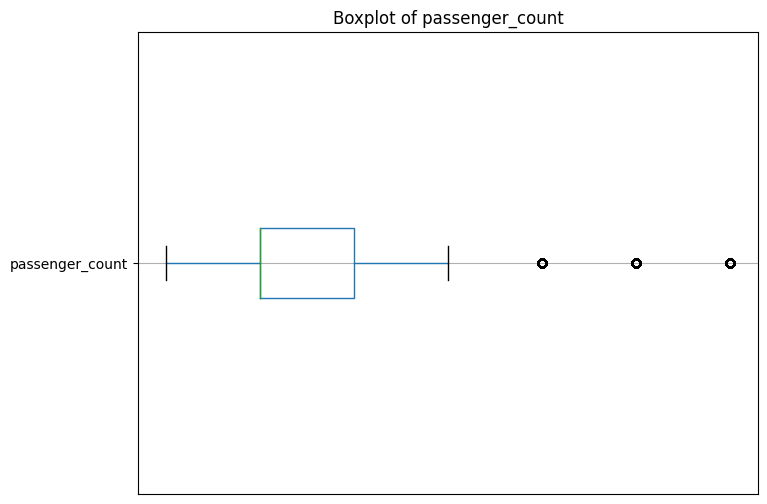

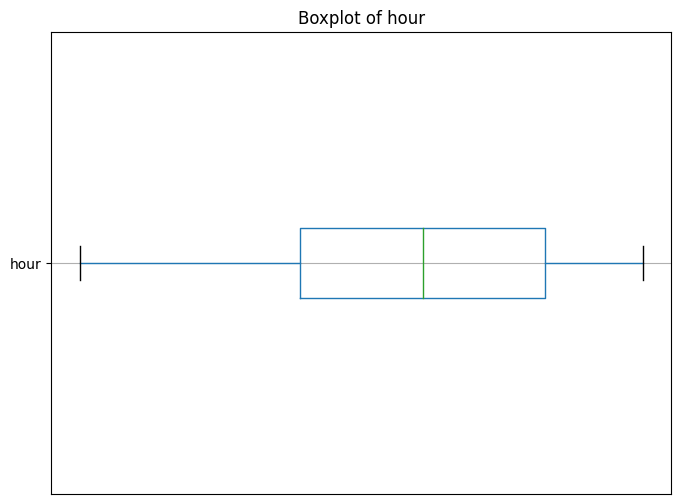

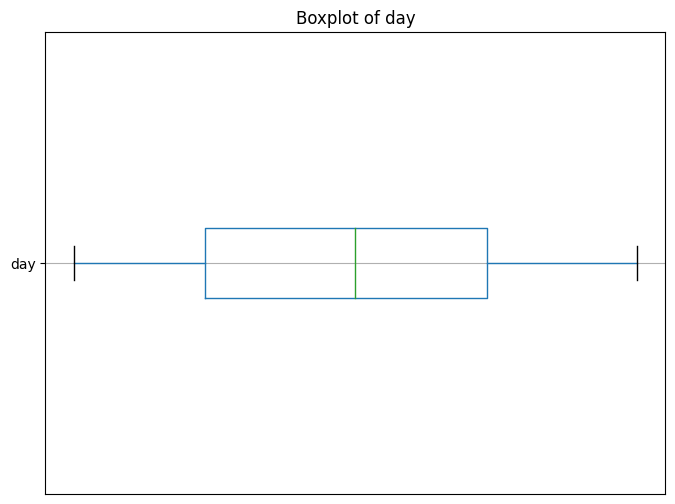

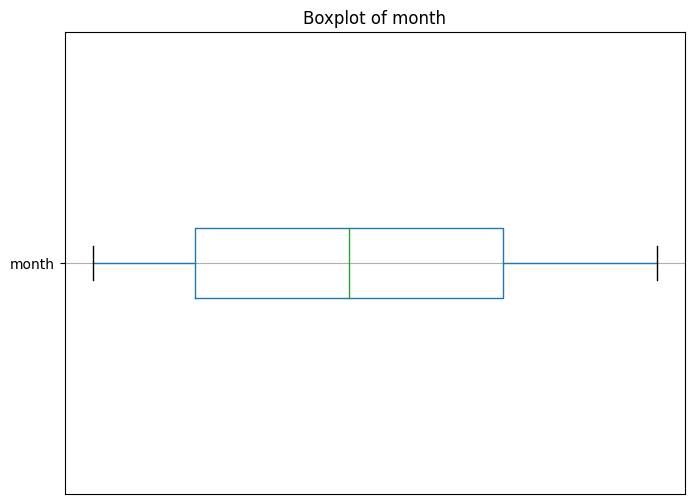

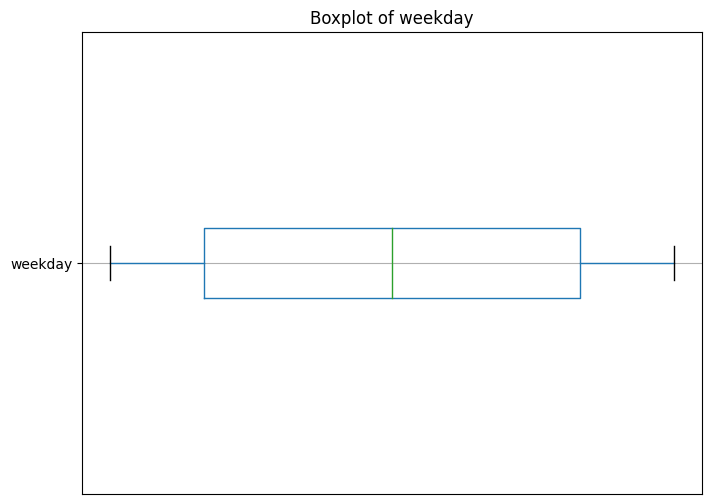

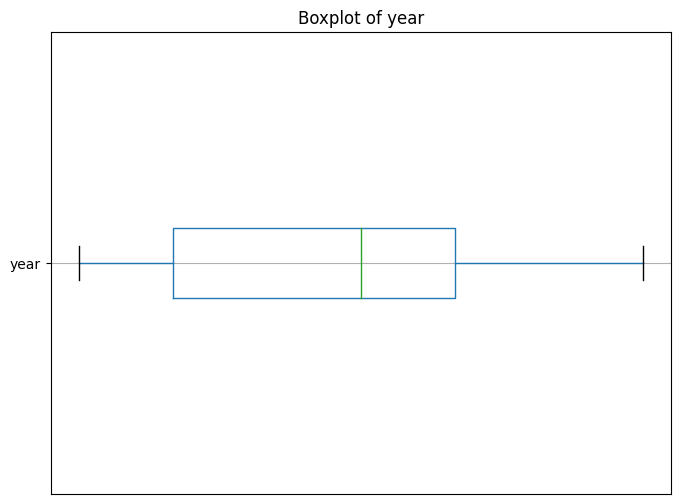

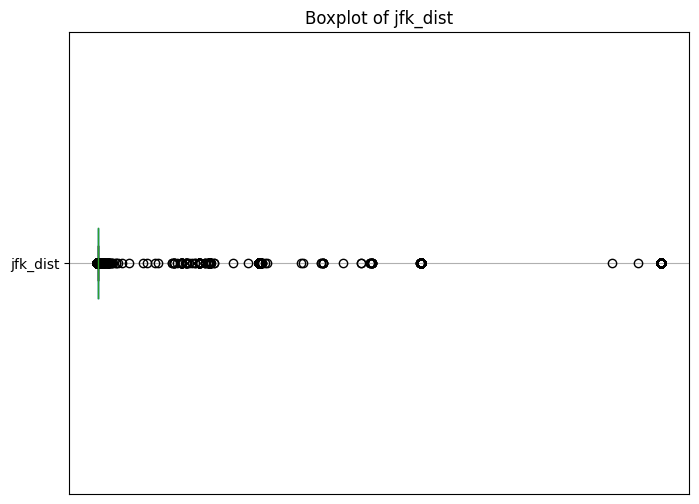

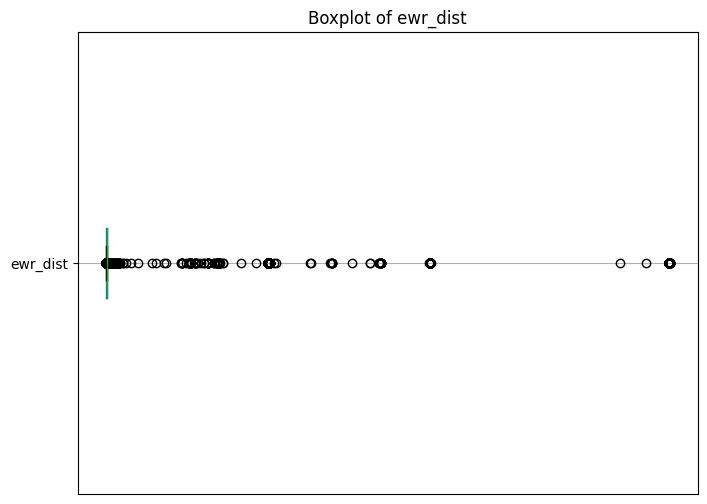

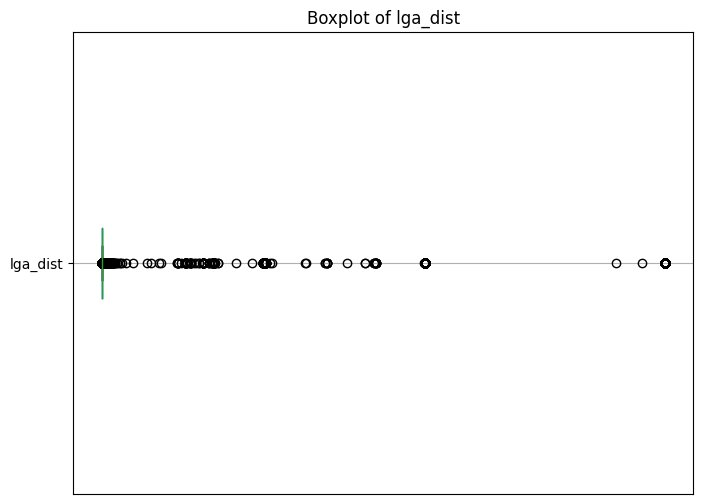

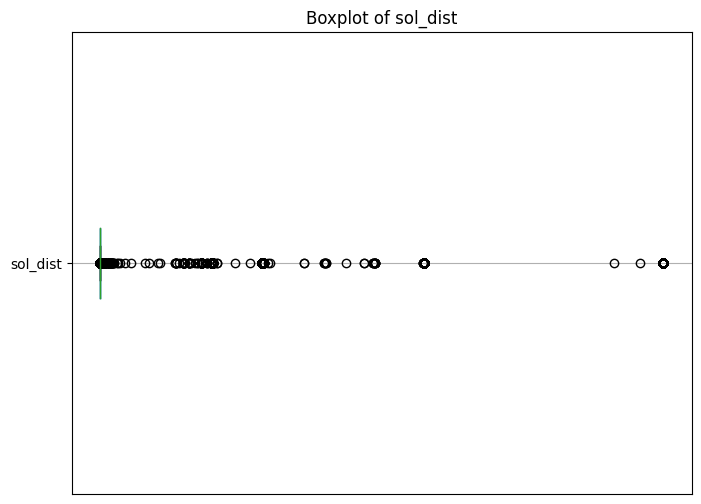

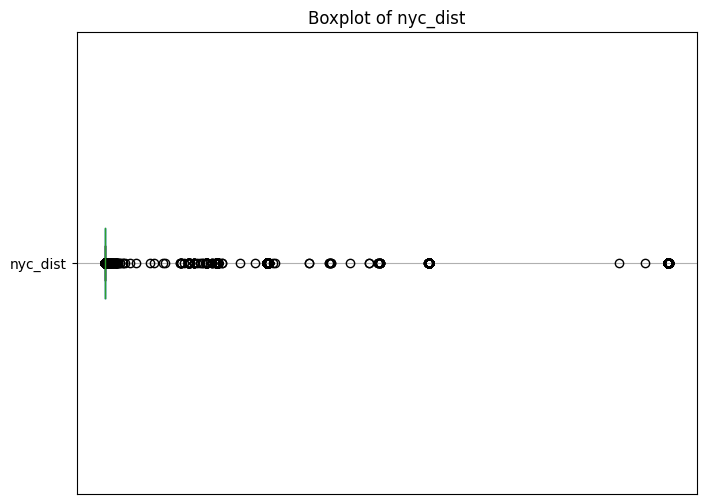

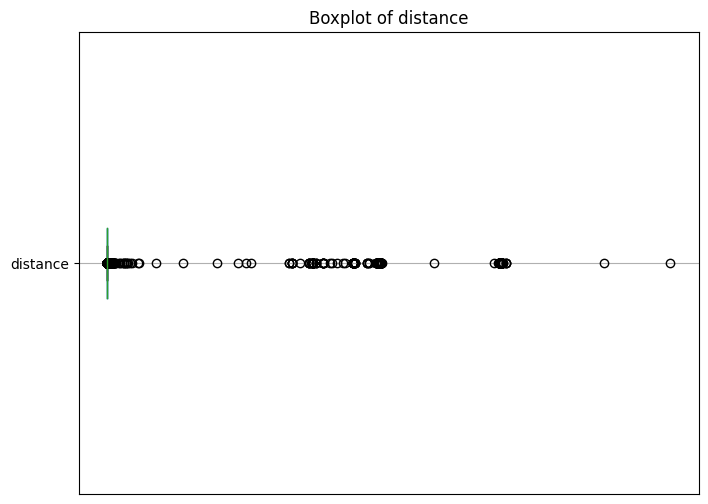

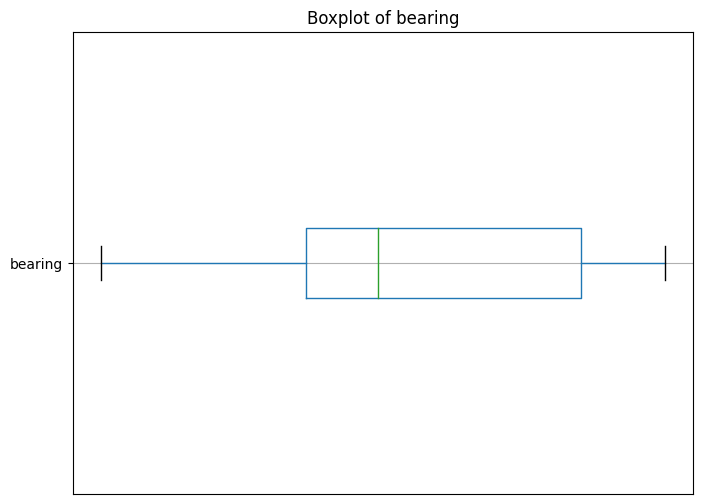

In [13]:
plot_boxplot_per_column(df)

In [14]:
def drop_outliers(df):
    """
    Remove outliers from numerical columns in the DataFrame using the IQR method.

    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_clean = df.copy()

    # Iterate over each column in the DataFrame
    for col in df_clean.columns:
        if df_clean[col].dtype in ['float64', 'int64', 'int32']:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)

            # Calculate the Interquartile Range (IQR)
            IQR = Q3 - Q1

            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Drop rows with outliers in the current column
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [15]:
df_dropped_outliers = drop_outliers(df)

In [16]:
df_dropped_outliers.shape

(341511, 26)

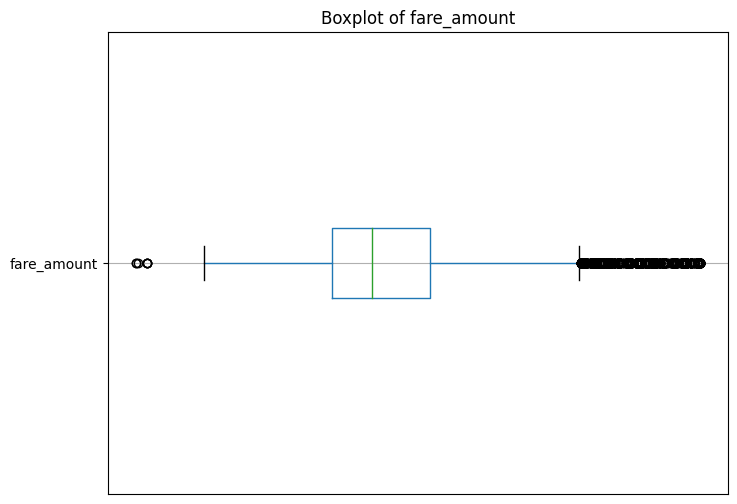

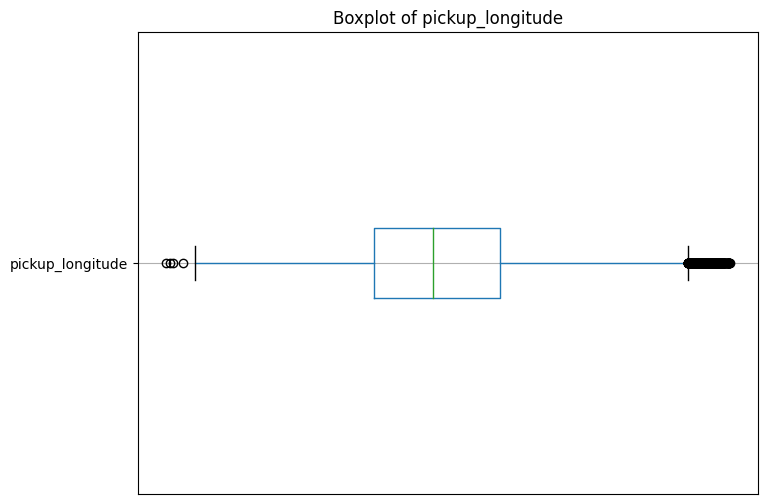

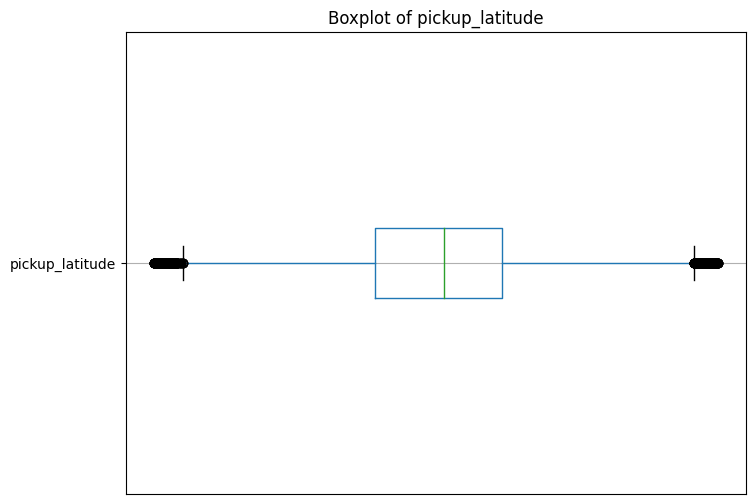

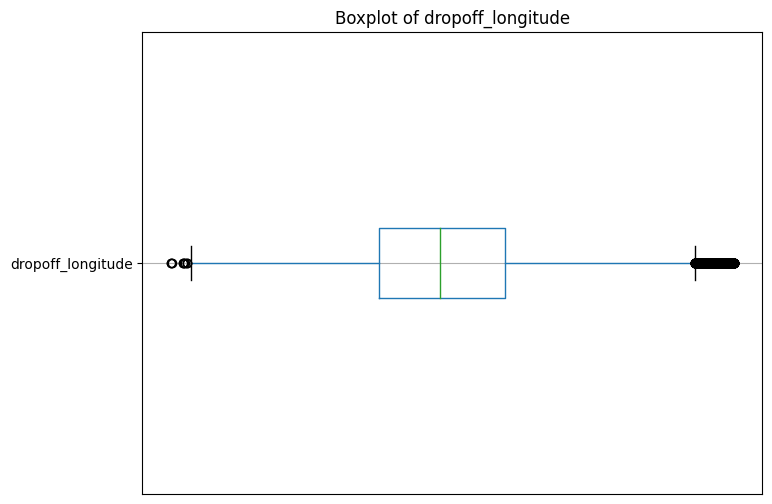

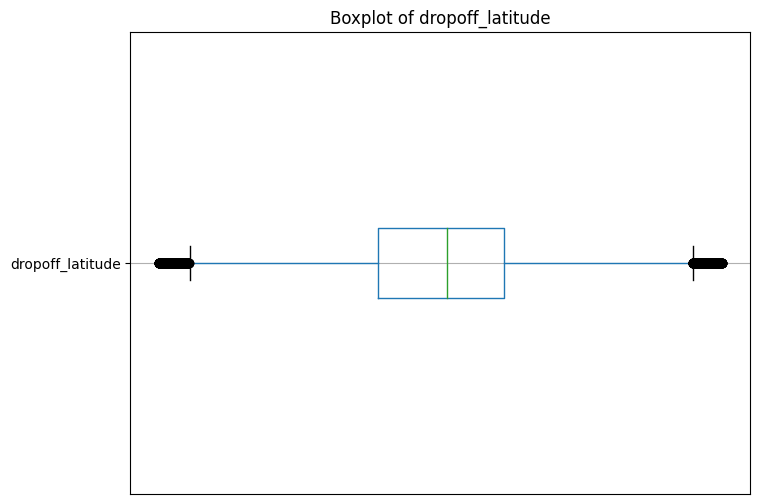

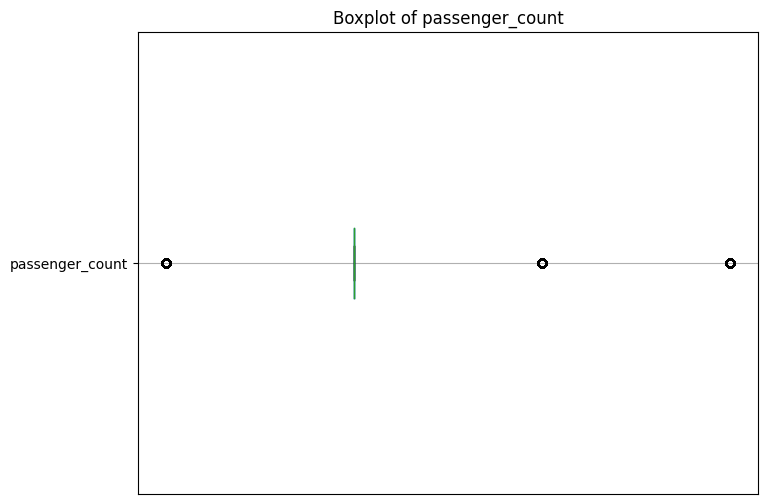

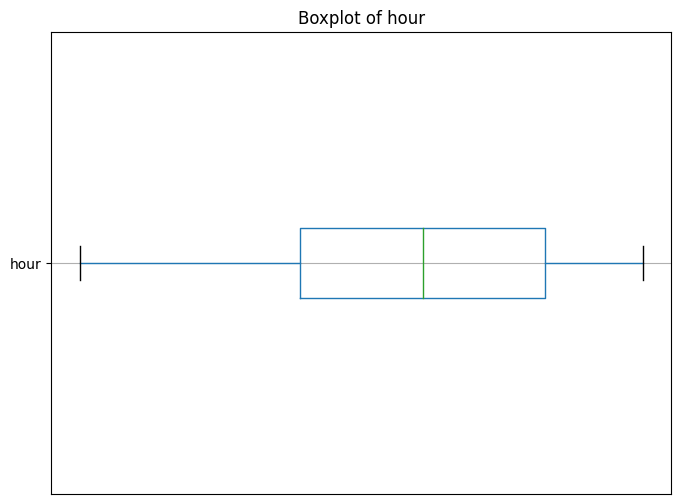

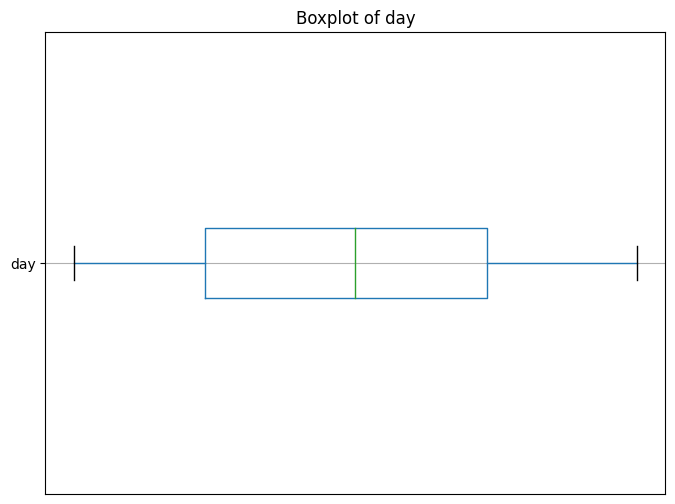

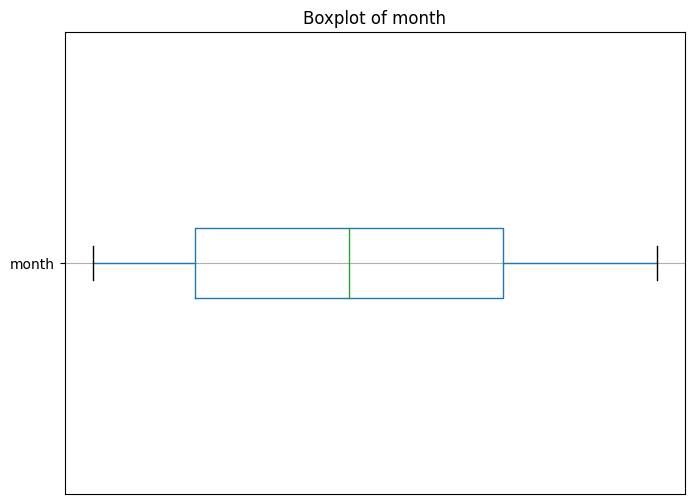

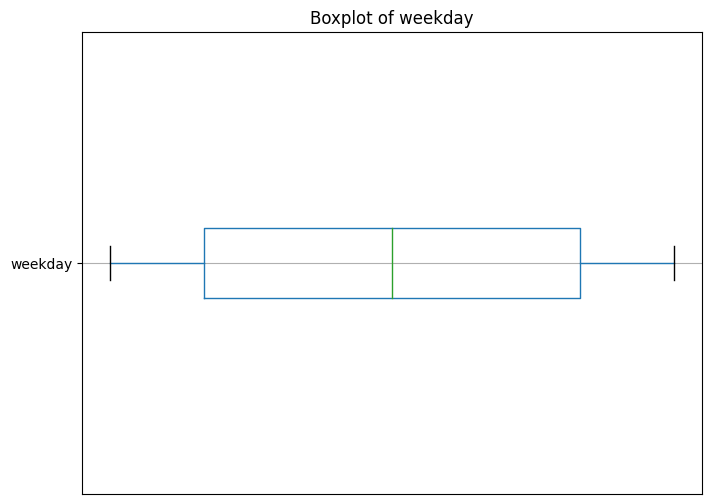

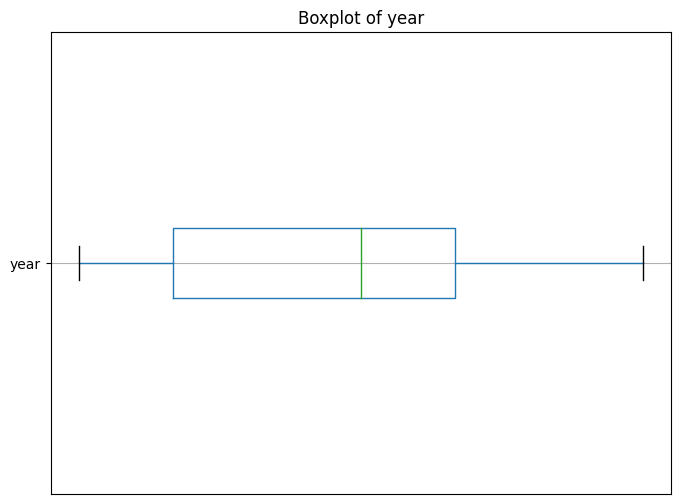

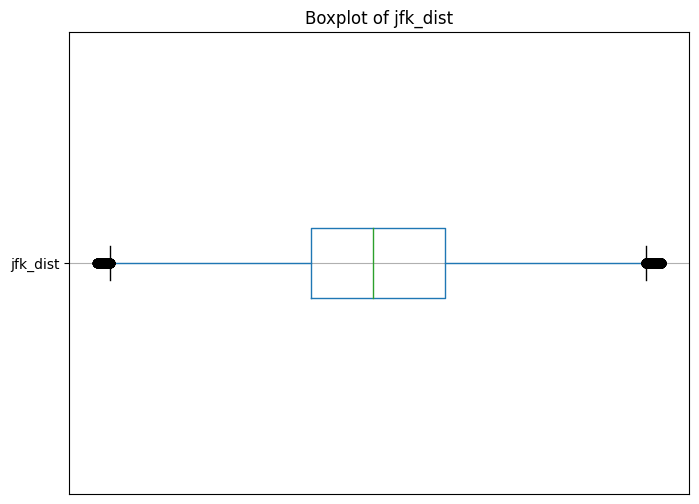

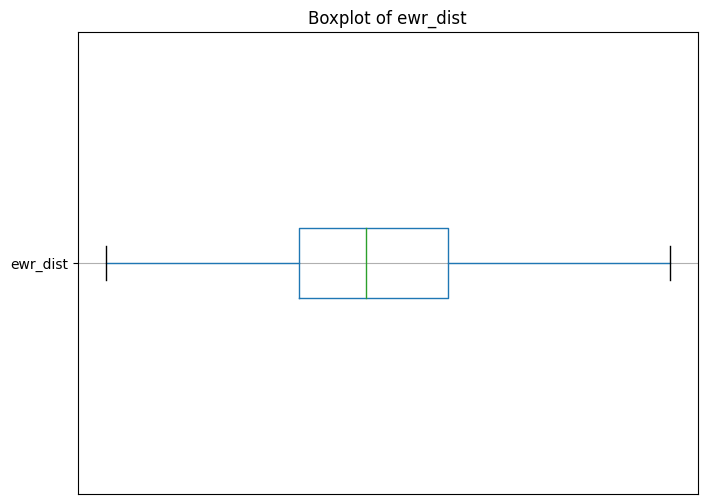

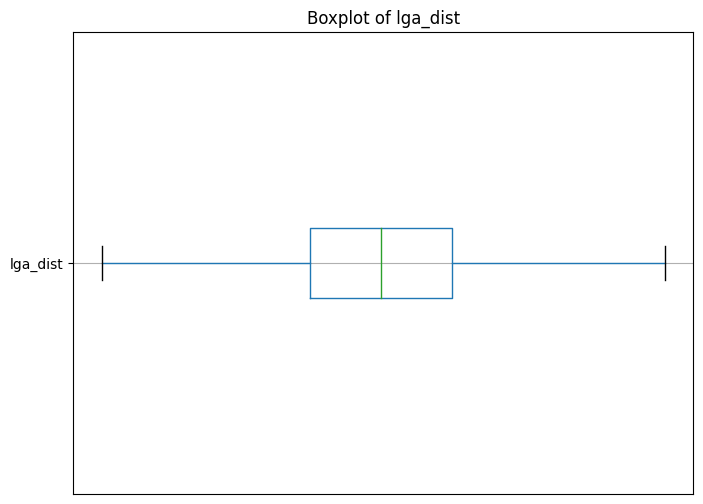

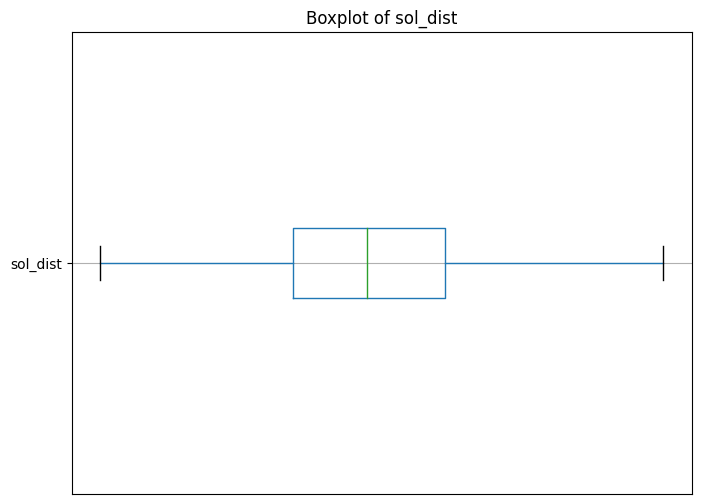

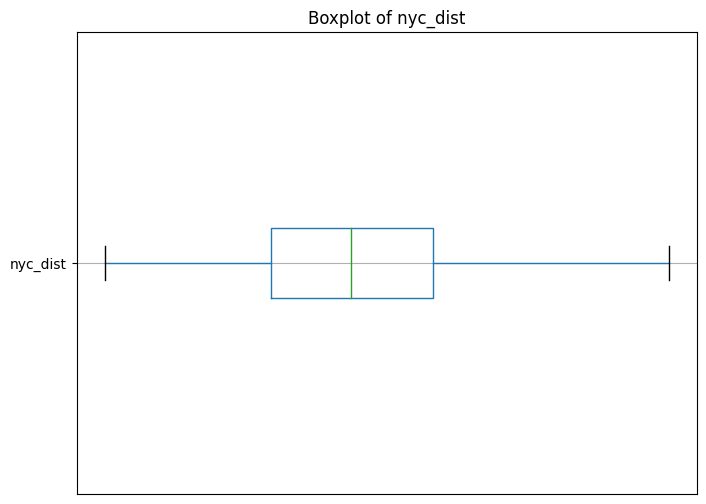

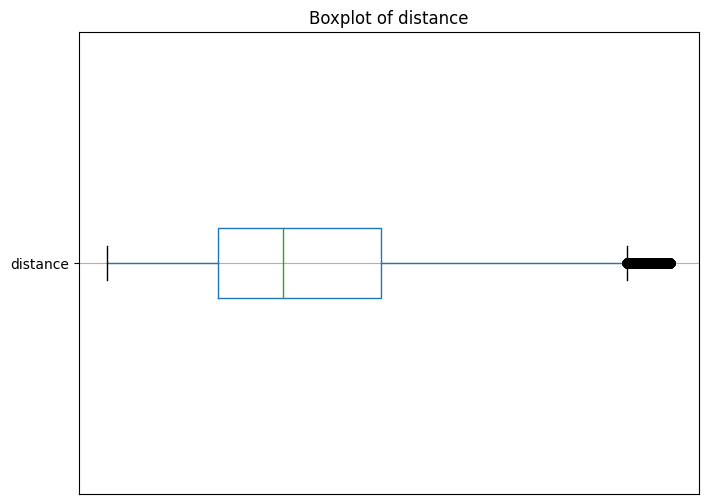

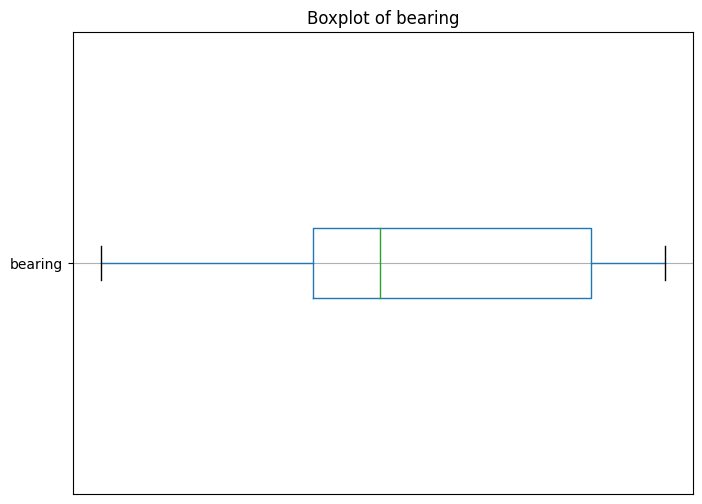

In [17]:
plot_boxplot_per_column(df_dropped_outliers)

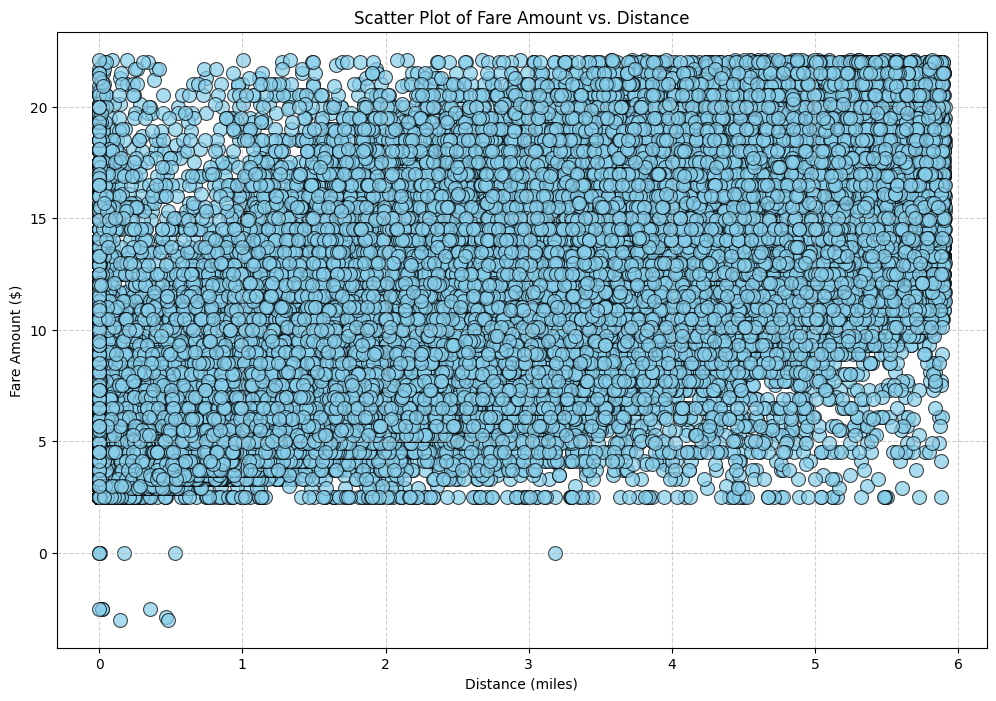

In [18]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_dropped_outliers, x='distance', y='fare_amount', color='Skyblue', s=100, alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of Fare Amount vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
df_dropped_outliers = df_dropped_outliers.drop(columns=['User ID' , 'User Name' , 'Driver Name' , 'key' , 'pickup_datetime' ])

In [20]:
df_dropped_outliers

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,Excellent,sunny,Congested Traffic,12.1,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,Excellent,windy,Flow Traffic,7.5,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499989,Bad,sunny,Congested Traffic,15.7,-1.290671,0.711749,-1.291419,0.711215,1,8,10,9,3,2009,43.045475,36.960057,17.103925,20.882032,12.849483,4.958925,2.326242
499991,Excellent,rainy,Dense Traffic,6.0,-1.291267,0.711002,-1.291350,0.711189,1,0,1,5,3,2014,41.852444,32.686389,20.704710,15.442596,7.243390,1.258712,0.324497
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931


# Data encoding using **Label Encoder**

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# List of categorical columns to be encoded
categorical_columns = ['Car Condition' , 'Weather' , 'Traffic Condition']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df_dropped_outliers[col] = label_encoder.fit_transform(df_dropped_outliers[col])



In [23]:
df_dropped_outliers

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
2,0,2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,3,2,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,0,2,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,1,3,0,12.1,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,1,4,2,7.5,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499989,0,3,0,15.7,-1.290671,0.711749,-1.291419,0.711215,1,8,10,9,3,2009,43.045475,36.960057,17.103925,20.882032,12.849483,4.958925,2.326242
499991,1,1,1,6.0,-1.291267,0.711002,-1.291350,0.711189,1,0,1,5,3,2014,41.852444,32.686389,20.704710,15.442596,7.243390,1.258712,0.324497
499995,0,1,1,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,3,1,2,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931


In [24]:
df_dropped_outliers.dtypes

,0
Car Condition,int64
Weather,int64
Traffic Condition,int64
fare_amount,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int64


# Feature selection using **K Best features**

In [25]:
x = df_dropped_outliers.drop(columns = ['fare_amount'])
y = df_dropped_outliers['fare_amount']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [27]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [28]:
# Define a function for feature selection
def feature_selection(X, y, X1):
    # Perform feature selection using mutual information
    selector = SelectKBest(mutual_info_regression, k=7)  # Select top 7 features
    X_new = selector.fit_transform(X, y)
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = X1.columns[selected_feature_indices]
    print("Selected feature names:", selected_feature_names)
    print("The number of features:", len(selected_feature_names))
    return X_new, y

In [29]:
# Create a DataFrame with columns for easy reference
X1 = pd.DataFrame(X_scaled, columns=df_dropped_outliers.drop(columns=['fare_amount']).columns)

In [30]:
# Perform feature selection
X_selected, y_selected = feature_selection(X_scaled, y, X1)


Selected feature names: Index(['dropoff_latitude', 'year', 'ewr_dist', 'lga_dist', 'nyc_dist',
       'distance', 'bearing'],
      dtype='object')
The number of features: 7


In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

In [35]:
# Calculate the R² score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [36]:
# Print accuracy metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

R² Score: 0.633
Mean Squared Error: 4.338
Root Mean Squared Error: 2.083


In [50]:
import lightgbm as lgb

In [38]:
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [43]:
# Define early stopping callback
early_stopping = lgb.callback.early_stopping(stopping_rounds=10, first_metric_only=True)

In [44]:
# Define initial LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1
}

In [45]:
# Train the LightGBM model# Train the LightGBM model
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    callbacks=[early_stopping]
)


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1.84105
Evaluated only: rmse


In [46]:
# Predict on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [47]:
# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [48]:
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

RMSE: 1.841
R² Score: 0.713


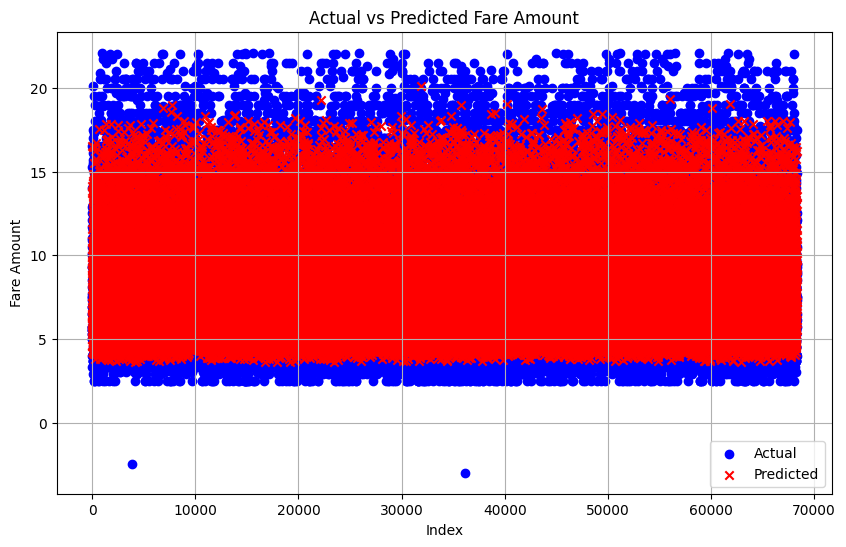

In [49]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Index')
plt.ylabel('Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

In [55]:
# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10],
    'min_data_in_leaf': [20, 50, 100],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [0, 1, 5]
}

In [53]:
# Create a LightGBM Regressor
lgbm = LGBMRegressor(boosting_type='gbdt', objective='regression', metric='rmse', random_state=42)

In [56]:
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


In [ ]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

In [ ]:
# Train the LightGBM model with best parameters
best_model = grid_search.best_estimator_

In [ ]:
# Predict on the test set
y_pred_best = best_model.predict(X_test)

In [ ]:
# Calculate RMSE and R2 score for the tuned model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

In [ ]:
print(f"RMSE (Tuned Model): {rmse_best:.3f}")
print(f"R² Score (Tuned Model): {r2_best:.3f}")

In [ ]:
# Plot Actual vs Predicted values for the tuned model
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(range(len(y_pred_best)), y_pred_best, label='Predicted (Tuned)', color='green', marker='x')
plt.xlabel('Index')
plt.ylabel('Fare Amount')
plt.title('Actual vs Predicted Fare Amount (Tuned Model)')
plt.legend()
plt.grid(True)
plt.show()